# Technical Challenge Data Analyst   

<em>Jules Albin</em>

## <font color='DarkBlue'>I. <ins>Gathering DATA</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins>Retrieving data from csv files </ins>: <font color='violet'></font>

In [1]:
dataset = "../data/measurements.csv"

## <font color='DarkBlue'>II. <ins>Loading Datasets</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Importing libraries</ins>: <font color='violet'></font>

In [2]:
import julestools as jt
import pandas as pd
import numpy as np

### <font color='MediumBlue'>2 - <ins>Sources </ins>: <font color='violet'></font>

In [3]:
source = dataset

### <font color='MediumBlue'>3 - <ins>Loading Datasets </ins>: <font color='violet'></font>

In [4]:
df = pd.read_csv(source)

<ins><strong> Glancing at the dataset:   </strong></ins>

In [5]:
df.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN


<ins><strong>Displaying number of rows and number of columns:  </strong></ins>

In [6]:
print(f"{df.shape[0]} rows, {df.shape[1]} columns")

388 rows, 12 columns


## <font color='DarkBlue'>III. <ins>Data Wrangling:</ins> cleaning, formating... : <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins>Cleaning Columns Name </ins>: <font color='violet'></font>

<strong><em>Stripping, renaming in lower case and replacing spaces with "_" :</strong></em>

In [7]:
jt.fix_col_names(df)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


<strong><em>Renaming columns names:</strong></em>

Not Applicable

### <font color='MediumBlue'>2 - <ins>Cleaning invalid Values </ins>: <font color='violet'></font>

In [8]:
df['distance'] = df['distance'].str.replace(',','.')
df['consume'] = df['consume'].str.replace(',','.')
df['temp_inside'] = df['temp_inside'].str.replace(',','.')

### <font color='MediumBlue'>3 - <ins>Dealing with Null values </ins>: <font color='violet'></font>

There are several options:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model

<ins><strong>Identifying columns with Null values : </strong></ins>

In [9]:
print(*list(df.isna().any()[lambda x: x == True].index),sep="\n")

temp_inside
specials
refill_liters
refill_gas


<AxesSubplot: >

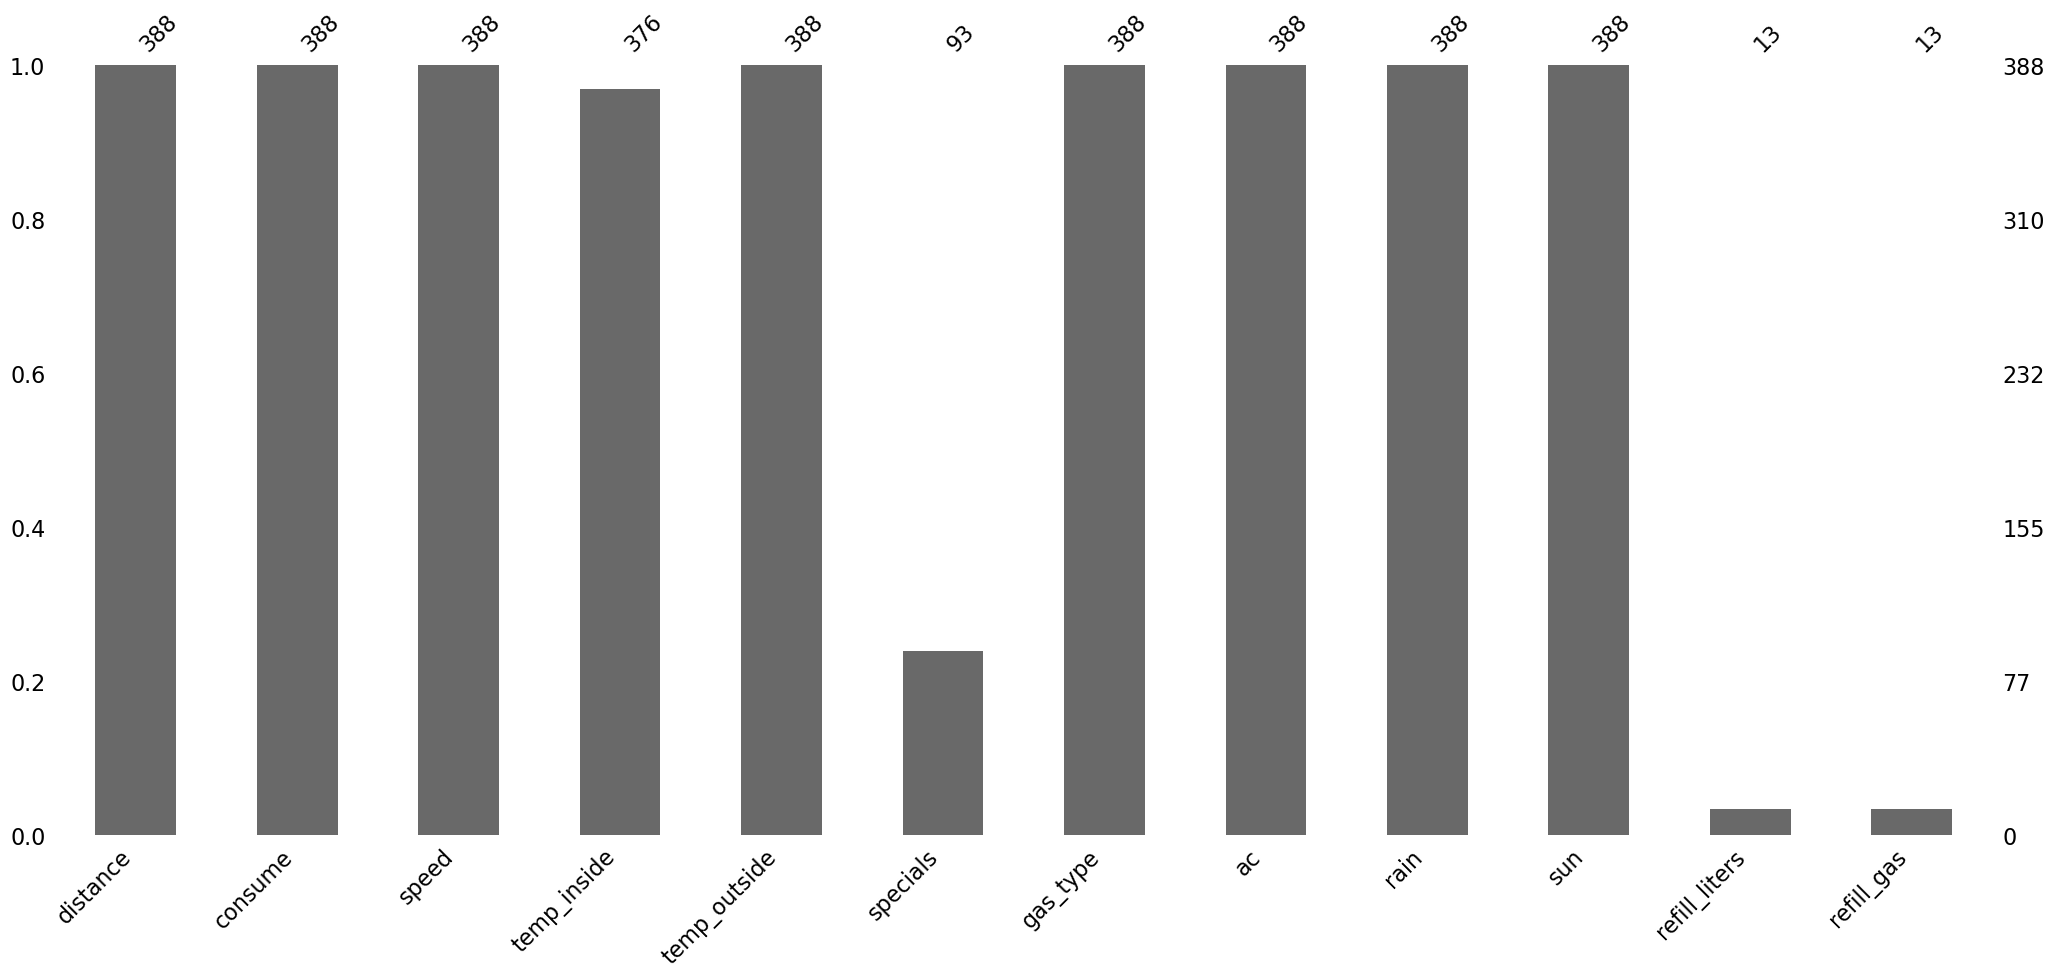

In [10]:
# Visualize the number of missing. values as a bar chart
import missingno as msno
msno.bar(df) 

In [11]:
# Calculating the percentage of missing values per column
round(df.isna().sum()/df.shape[0]*100,2)

distance          0.00
consume           0.00
speed             0.00
temp_inside       3.09
temp_outside      0.00
specials         76.03
gas_type          0.00
ac                0.00
rain              0.00
sun               0.00
refill_liters    96.65
refill_gas       96.65
dtype: float64

<ins><strong>Removing columns with Null values : </strong></ins>

In [12]:
df.drop(columns = ['specials','refill_liters','refill_gas'], inplace=True)
df.reset_index(inplace=True, drop=True)

<ins><strong>Removing rows with Null values : </strong></ins>

In [13]:
df.dropna(subset=['temp_inside'], inplace=True)

<ins><strong>Replacing NaN values with 0 within columns:</strong></ins>

In [14]:
jt.nan_to_null(df)

<ins><strong>Checking again if there is any remaining missing value:</strong></ins>

In [15]:
df.isna().any()

distance        False
consume         False
speed           False
temp_inside     False
temp_outside    False
gas_type        False
ac              False
rain            False
sun             False
dtype: bool

### <font color='MediumBlue'>4 - <ins>Formatting data types </ins>: <font color='violet'></font>

<ins><strong>Listing data types:</strong></ins>

In [16]:
df.dtypes

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
ac               int64
rain             int64
sun              int64
dtype: object

<ins><strong>formating to float</strong></ins>

In [17]:
df['distance'] = df['distance'].apply(float)
df['consume'] = df['consume'].apply(float)
df['temp_inside'] = df['temp_inside'].apply(float)
df['speed'] = df['speed'].apply(float)

### <font color='MediumBlue'>5 - <ins>Dealing with duplicates </ins>: <font color='violet'></font>

In [18]:
df.duplicated().any()

False

<ins><strong>Removing columns with Null values : </strong></ins>

In [ ]:
# Removing column named 'col_name'
df.drop(columns = 'col_name', inplace=True)
df.reset_index(inplace=True, drop=True)

<ins><strong>Removing rows with Null values : </strong></ins>

In [ ]:
# Deleting rows with missing value for column customer
df.dropna(subset=['customer'], inplace=True)

<ins><strong>Filling columns with Null values : average value or backward-fill </strong></ins>

In [ ]:
# Filling missing value for customer_lifetime_value with average value
df.customer_lifetime_value =df.customer_lifetime_value.fillna(df.customer_lifetime_value.mean())

# Filling missing value for income with average value
df.income =df.income.fillna(df.income.mean())

# Filling missing value for gender with Backward-fill method
df.gender = df.gender.fillna(method='bfill')

<ins><strong>Replacing NaN values with 0 within columns:</strong></ins>

In [ ]:
cols = ['col1','col3']
nan_to_null(df,cols)

<ins><strong>Checking again if there is any remaining missing value:</strong></ins>

In [ ]:
df.isna().any()

### <font color='MediumBlue'>6 - <ins>Saving cleaned dataset into csv </ins>: <font color='violet'></font>

In [19]:
df.head(3)

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26.0,21.5,12,E10,0,0,0
1,12.0,4.2,30.0,21.5,13,E10,0,0,0
2,11.2,5.5,38.0,21.5,15,E10,0,0,0


In [20]:
df.to_csv('../data/clean.csv', index=False)

## <font color='DarkBlue'>IV. <ins>EDA: Exploratory Data Analysis</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Identifying variables and their specifications</ins>: <font color='violet'></font>

<ins><strong>Displaying number of unique values for each column : </strong></ins>

In [21]:
df.nunique().sort_values(ascending=True)

gas_type          2
ac                2
rain              2
sun               2
temp_inside      13
temp_outside     33
consume          43
speed            60
distance        169
dtype: int64

<ins><strong>Displaying number of unique values for each column that has less than 10 distinct values : </strong></ins>

In [22]:
df.nunique()[lambda x: x <= 15].sort_values(ascending=True)

gas_type        2
ac              2
rain            2
sun             2
temp_inside    13
dtype: int64

<strong><font color='BlueViolet'>Numerical</font></strong> **variables**:

In [23]:
num_var =df.select_dtypes(include=np.number).columns.tolist()

<strong><font color='BlueViolet'>Categorical</font></strong> **variables**:

In [24]:
cat_var =df.select_dtypes(include=['object']).columns.tolist()

### <font color='MediumBlue'>2 - <ins> Frequency Table</ins>: <font color='violet'></font>

In [25]:
fqcy_tab = df['gas_type'].value_counts(dropna=False)
fqcy_tab

gas_type
SP98    219
E10     157
Name: count, dtype: int64

In [26]:
# Alternate method leveraging crosstable:

fqcy_table = round(100 * pd.crosstab(df['gas_type'], '% of gas_type') /len(df),2)   
fqcy_table

col_0,% of gas_type
gas_type,
E10,41.76
SP98,58.24


<ins><strong>Visualization : </strong></ins>

(array([0, 1]), [Text(0, 0, 'SP98'), Text(1, 0, 'E10')])

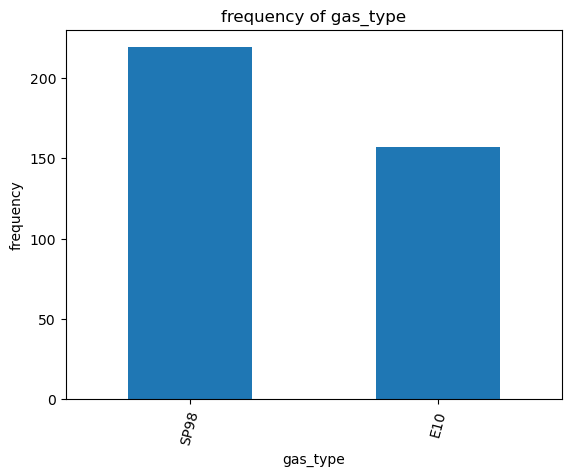

In [27]:
# Bar Plot

import matplotlib.pyplot as plt
import seaborn as sns

df['gas_type'].value_counts().sort_values(ascending=False)[:5].plot(kind='bar', title='frequency of gas_type')
plt.xlabel('gas_type')
plt.ylabel('frequency')
plt.xticks(rotation=75)

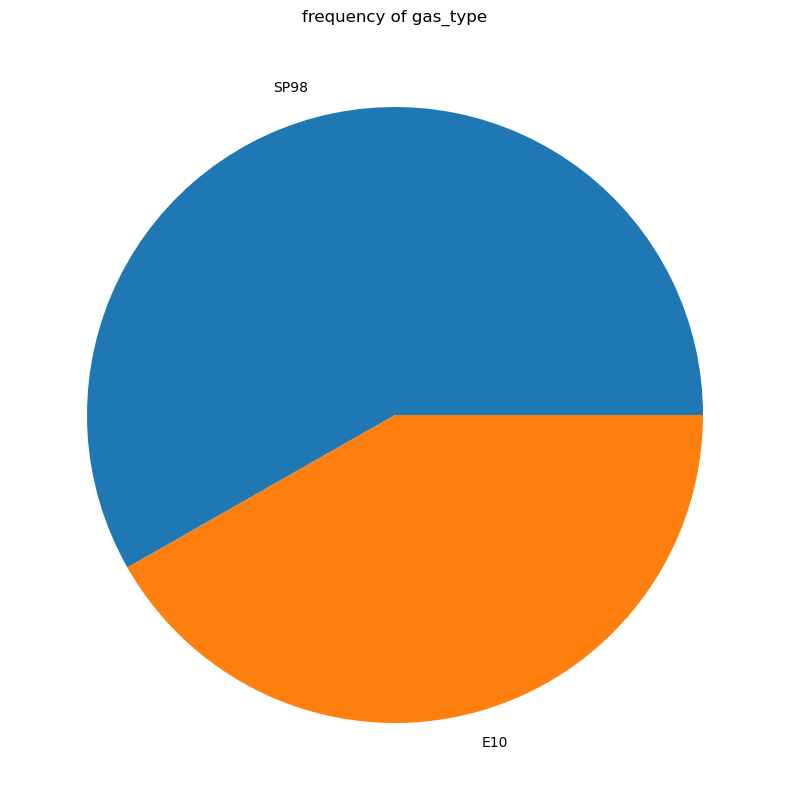

In [28]:
# Pie Chart

plt.figure(figsize=(10, 10))
plt.pie(df['gas_type'].value_counts().sort_values(ascending=False)[:5], labels = df['gas_type'].value_counts().sort_values(ascending=False)[:5].index)
plt.title('frequency of gas_type')
plt.show()

### <font color='MediumBlue'>3 - <ins> Measures of Centrality</ins>: <font color='violet'></font>

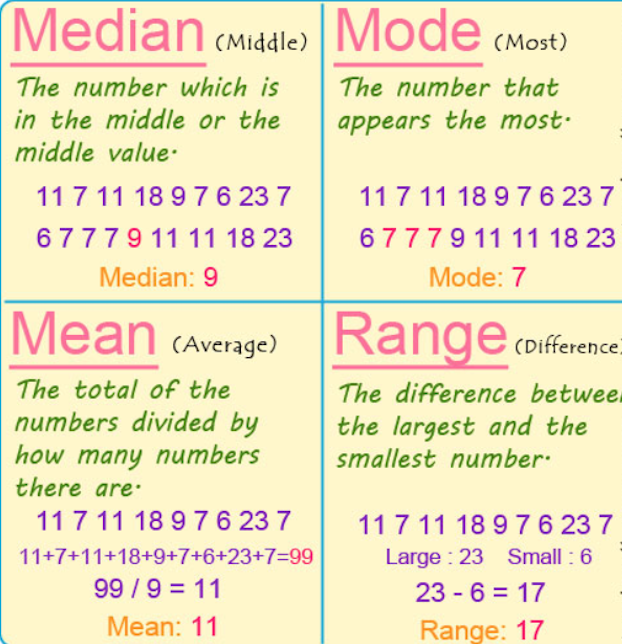

<ins><strong>Mean : </strong></ins>

In [29]:
round(df['consume'].mean(),2)

4.93

<ins><strong>Median : </strong></ins>

In [30]:
df['consume'].median()

4.7

<ins><strong>Mode : </strong></ins>

In [31]:
df['consume'].mode()[0]

4.5

####  <font color='CornflowerBlue'>The average consumption point  <font color='green'>4.93</font> (the mean) is approximately <font color='red'>1.09 times</font> the most common consumption point <font color='green'>4.5</font> (the mode).</font>

### <font color='MediumBlue'>3 - <ins> Measures of Dispersion</ins>: <font color='violet'></font>

<ins><strong>Variance : </strong></ins>

In [32]:
round(df['consume'].var(),2)

1.08

<ins><strong>Standard Deviation : </strong></ins>

In [33]:
round(df['consume'].std(),2)

1.04

<ins><strong>Range : </strong></ins>

In [34]:
df['consume'].max() - df['consume'].min()

8.899999999999999

<ins><strong>IQR : </strong></ins>

In [35]:
df['consume'].quantile([0.25, 0.75])[0.75] - df['consume'].quantile([0.25, 0.75])[0.25]

1.0

####  <font color='CornflowerBlue'>Consumption is volatile. And the range  of approximately <font color='green'>8.9</font> indicates a <font color='red'>significant spread</font> in Consumption .</font>

<ins><strong>Visualization : </strong></ins>

Text(0.5, 0, 'consumption frequency')

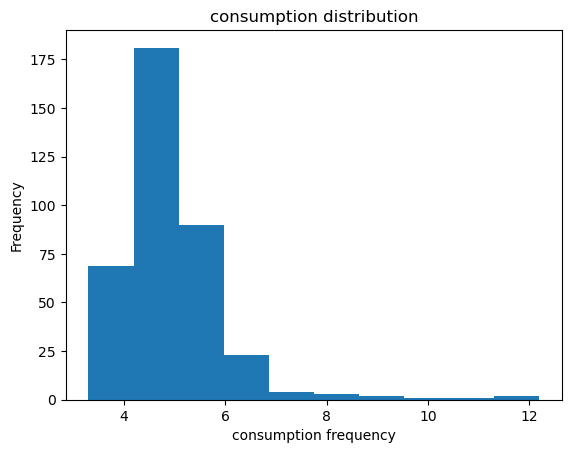

In [36]:
# Histogram
df['consume'].plot(kind='hist', title='consumption distribution')
plt.xlabel('consumption frequency')

<AxesSubplot: xlabel='consume'>

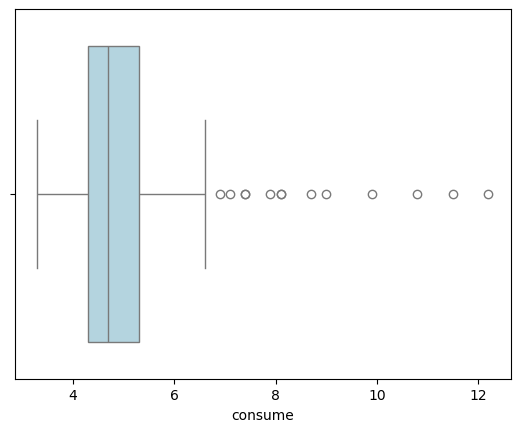

In [37]:
# Boxplot
sns.boxplot(data = df['consume'], color="lightblue",  orient='h')

### <font color='MediumBlue'>4 - <ins> Shape of the Distribution</ins>: <font color='violet'></font>

<ins><strong>kurtosis : </strong></ins>

In [38]:
df['consume'].kurtosis()

14.379364463196623

<ins><strong>skewness : </strong></ins>

In [39]:
df['consume'].skew()

2.9415884771194283

<ins><strong>Visualization : </strong></ins>

Text(0.5, 0, 'consume')

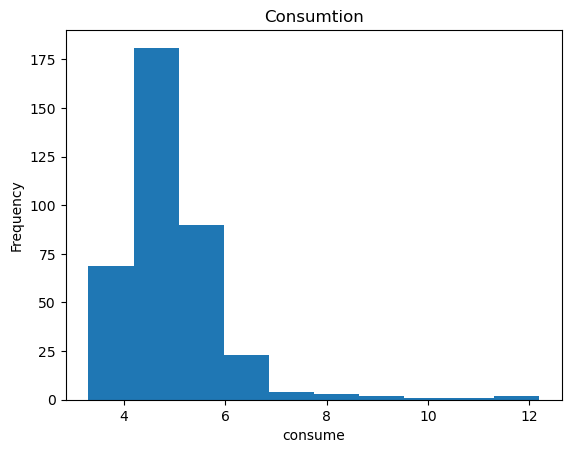

In [40]:
df['consume'].plot(kind='hist', title='Consumtion')
plt.xlabel('consume')

####  <font color='CornflowerBlue'>The value of <font color='red'>5</font> seems to be the most common consumption. Which is not consistent with the mode of <font color='red'>consumption</font> calculated previously.</font>

### <font color='MediumBlue'>5 - <ins> Crosstab Analysis</ins>: <font color='violet'></font>

In [42]:
x = pd.crosstab(df['gas_type'], df['consume'])

In [ ]:
# print( *list(((x[True] / (x[False] + x[True])).sort_values(ascending = False)).head(3).index), sep = "\n")

### <font color='MediumBlue'>6 - <ins> Statistical Tests</ins>: <font color='violet'></font>

- Conducting a Chi-square test to determine if the consumption is independent of the gas_type.

In [43]:
from scipy.stats import chi2_contingency

chi2_contingency(x)[:2]

(46.357315763032474, 0.297320055548537)

#####  <font color='Blue'> A p-value of <font color='Red'> 0.29</font> fails to reject the null hypothesis. Hence the `consumption` distribution is not correlated to the `gas type`. .</font>

- Computing Cramér's V to understand the strength of association between best-seller status and category.

In [44]:
from scipy.stats.contingency import association

association(x)

0.35112780210675487

#####  <font color='Blue'> An association value of <font color='Red'> 0.35</font> indicates that the strengh of the correlation between `gas type` and `consumption` is weak .</font>

### <font color='MediumBlue'>7 - <ins> Outliers</ins>: <font color='violet'></font>

For this purpose, we are using the IQR (Interquartile Range) method. 

In [45]:
q3, q1 = df['consume'].quantile([0.25, 0.75])[0.75], df['consume'].quantile([0.25, 0.75])[0.25]
iqr = q3 - q1
l_bound , u_bound = q1 - 1.5 * iqr , q3 + 1.5 * iqr
df1 = df[(df['consume'] >= l_bound) & (df['consume'] <= u_bound)]

**Violin Plots**

<AxesSubplot: xlabel='consume', ylabel='gas_type'>

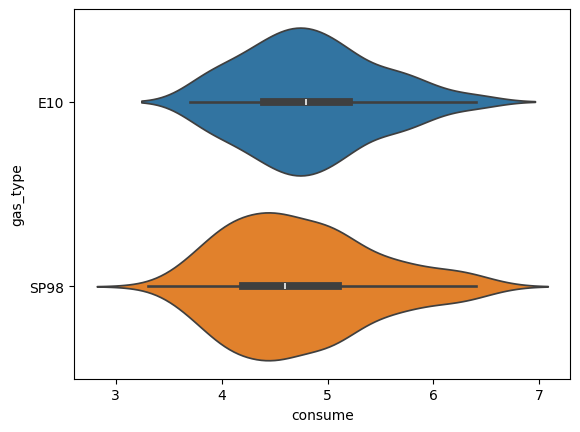

In [46]:
sns.violinplot(data=df1[df1['gas_type'].isin(df1['gas_type'].value_counts().sort_values(ascending=False).head(2).index)], y='gas_type', x='consume', hue='gas_type')

- Which gas_type tends to have the highest median consumption?

In [47]:
list(df.groupby('gas_type')['consume'].median().sort_values(ascending=False).head(1).index)[0]

'E10'

**Bar Chart**

<AxesSubplot: xlabel='consume', ylabel='gas_type'>

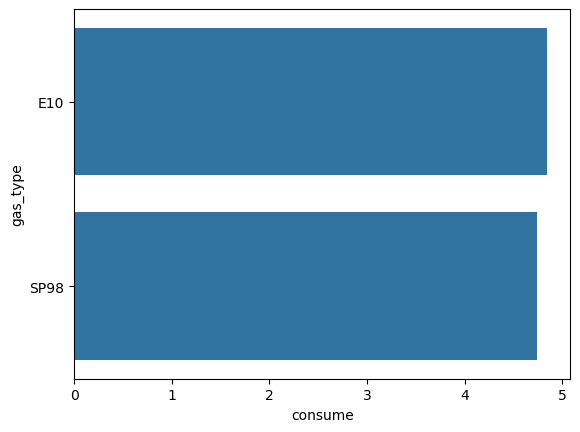

In [48]:
sns.barplot(data=df1[df1['gas_type'].isin(df1['gas_type'].value_counts().sort_values(ascending=False).head(10).index)],x='consume', y='gas_type', errorbar=None)

- Which gas_type commands the highest average consumption?

In [49]:
list(df.groupby('gas_type')['consume'].mean().sort_values(ascending=False).head(1).index)[0]

'E10'

**Box Plot**

<AxesSubplot: xlabel='temp_outside', ylabel='gas_type'>

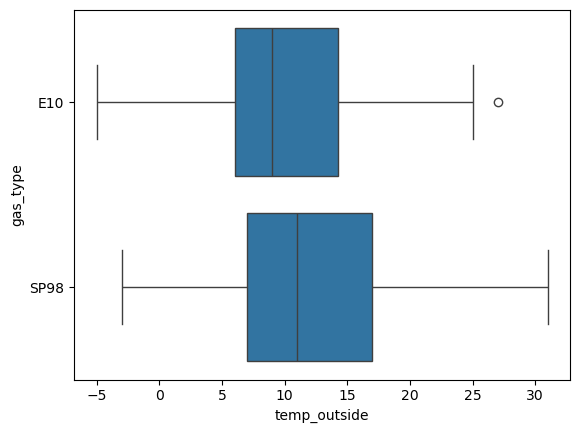

In [50]:
sns.boxplot(data=df1[df1['gas_type'].isin(df1['gas_type'].value_counts().sort_values(ascending=False).head(2).index)],x='temp_outside', y='gas_type')

- Which gas_type tends to be used for the highest median temp_outside?

In [51]:
list(df.groupby('gas_type')['temp_outside'].median().sort_values(ascending=False).head(1).index)[0]

'SP98'

### <font color='MediumBlue'>8 - <ins> Analysing correlations</ins>: <font color='violet'></font>

- Calculating the correlation coefficient between `consume` and `temp_outside`.

In [52]:
abs(df1['consume'].corr(df1['temp_outside']))

0.4172446081721718

**Visualizations**

<AxesSubplot: xlabel='temp_outside', ylabel='consume'>

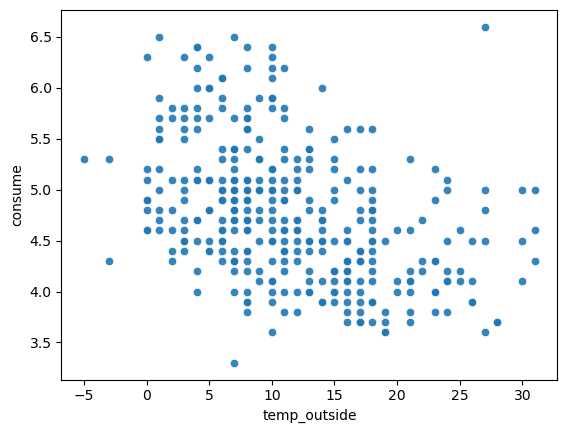

In [53]:
sns.scatterplot(data=df1, x='temp_outside', y='consume',alpha=0.9)

- Correlation heatmap to visualize correlations between all numerical variables.

**Correlation Matrix**

In [54]:
correlations_matrix = df[num_var].corr()

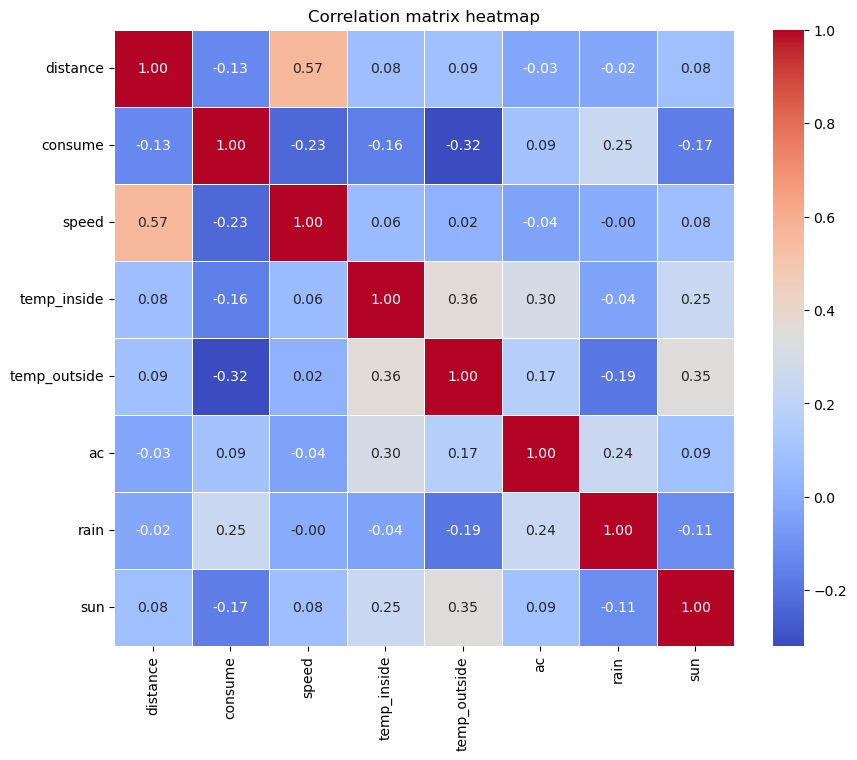

In [55]:
if len(num_var) < 21:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation matrix heatmap')
    plt.show()
else :
    print("There are too many variables to visualize the Correlation matrix heatmap! ")

- Examining if `consumption` typically is following a <font color='blue'>normal distribution</font> using a QQ plot. 

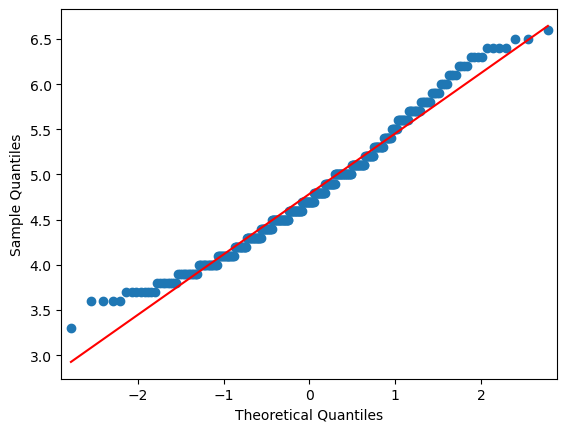

In [56]:
import statsmodels.api as sm

sm.qqplot(df1['consume'], line='s');

In [57]:
high_corr_threshold = 0.8
highly_correlated_pairs = []

for i in range(len(correlations_matrix.columns)):
    for j in range(i):
        if abs(correlations_matrix.iloc[i, j]) > high_corr_threshold:
            col_pair = (correlations_matrix.columns[i], correlations_matrix.columns[j], correlations_matrix.iloc[i, j])
            highly_correlated_pairs.append(col_pair)

for pair in highly_correlated_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} - Correlation: {pair[2]}")

In [58]:
def correlated_cols_to_del(df, num_vars, threshold=0.8):
    correlation_matrix = df[num_vars].corr()
    columns_to_del = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                columns_to_del.append(correlation_matrix.columns[j])
    return columns_to_del

cols_to_del = list(set(correlated_cols_to_del(df, num_var)))
print("Columns to delete where correlation is higher than 0.8 :")
print(*cols_to_del,sep="\n")

Columns to delete where correlation is higher than 0.8 :



### <font color='MediumBlue'>9 - <ins> Conclusion</ins>: <font color='violet'></font>

Except for speed and distance which are somehow correlated, we can draw some conclusions based on our observations, which are the following:
- Based on the violin plots, the E10 gas has the highest median consumption.
- Based on the QQ plots the consumption tends to follow a normal distribution
- Based on the scatterplot the outside temperature and the consumption seem slightly anti-correlated, in the sense that the lower the outside temperature the higher the consumption

<table><tr>
<td> 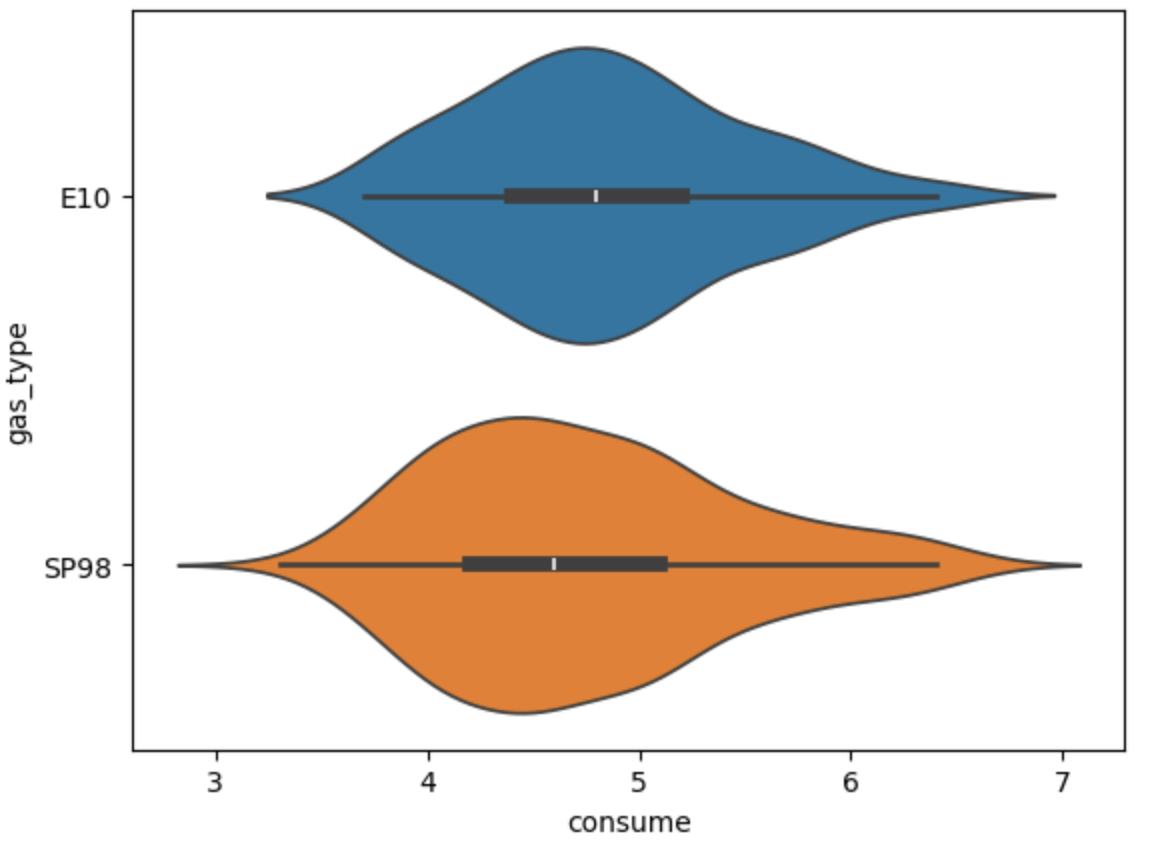 </td>
<td> 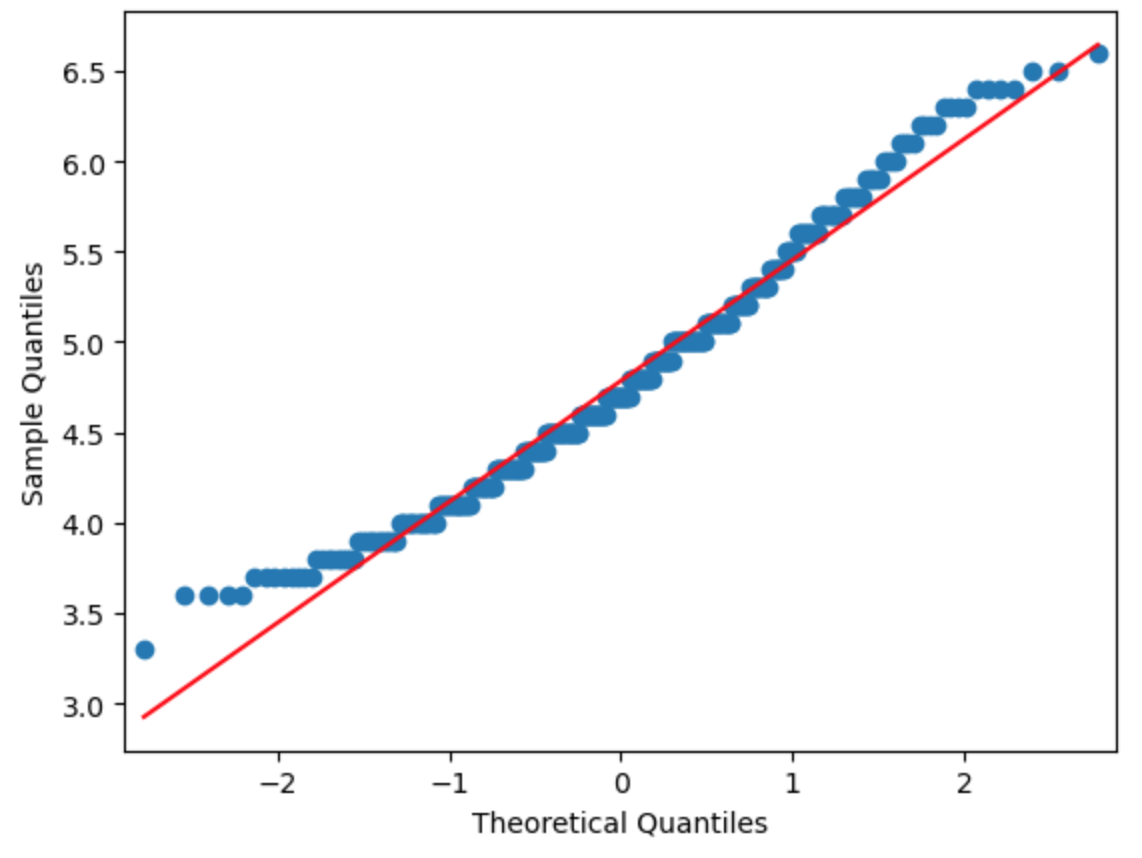 </td>
</tr></table>


<table><tr>
<td> 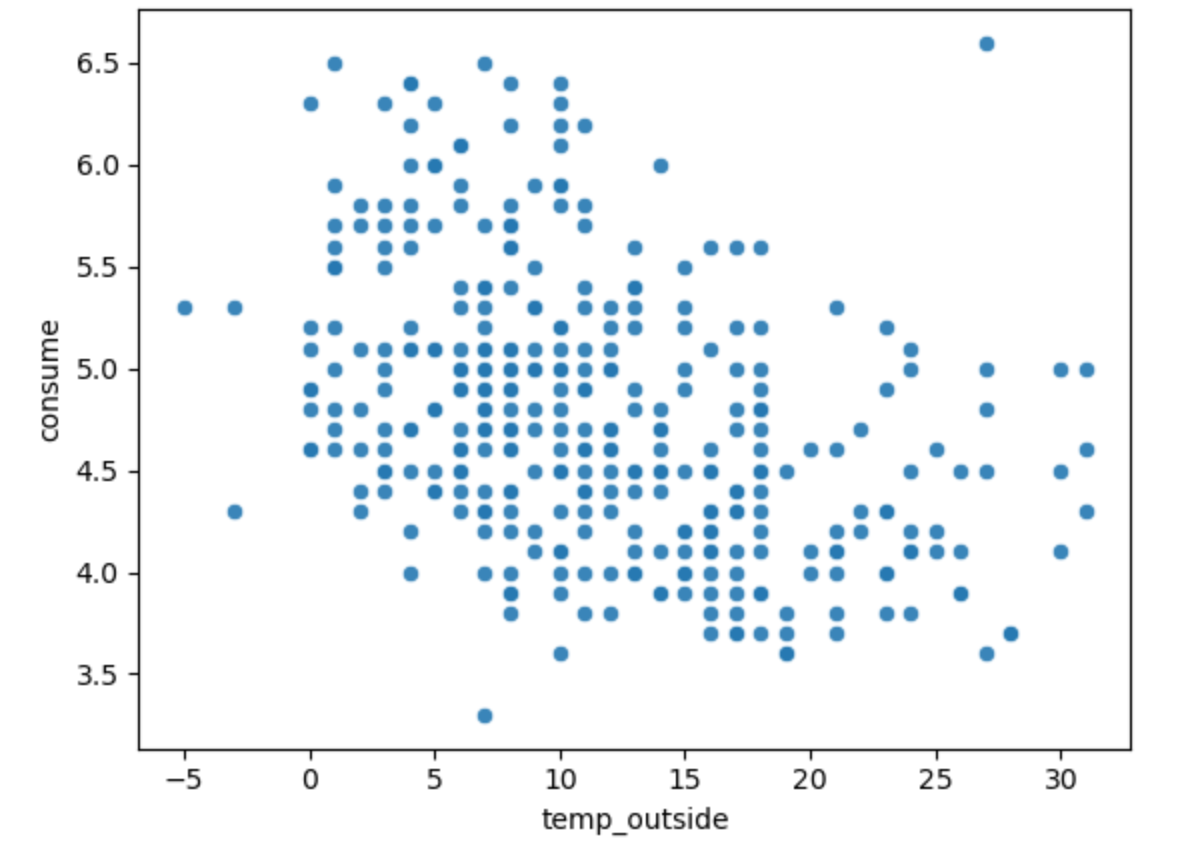 </td>
</tr></table>